In [26]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
pd.set_option('expand_frame_repr', False)

In [2]:

df = pd.read_csv("stop-and-search.csv")
df.head()


,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Geography,Geography_type,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported),Notes
0,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Avon & Somerset,Police Force Area,"15,018","9,050","1,599,555",9.39,NaN,NaN
1,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Bedfordshire,Police Force Area,"4,768","4,279","615,061",7.75,NaN,NaN
2,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cambridgeshire,Police Force Area,"8,773","8,582","804,841",10.9,NaN,NaN
3,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cheshire,Police Force Area,"6,472","6,390","1,027,709",6.3,NaN,NaN
4,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cleveland,Police Force Area,"12,137","11,453","557,227",21.78,NaN,NaN


In [3]:

df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace(',', '') for c in df.columns]

df.rows = [c.replace(',', '') for c in df.columns]

df.drop(["Notes"], axis=1, inplace=True)

indexNames = df[df["Rate_per_1000_population_by_ethnicity"] == " N/A "].index
df.drop(indexNames, inplace=True)

indexNames = df[df["Rate_per_1000_population_by_ethnicity"] == " -   "].index
df.drop(indexNames, inplace=True)


df["Rate_per_1000_population_by_ethnicity"] = df["Rate_per_1000_population_by_ethnicity"].astype(float)

df["Time"] = df["Time"].astype(str)

df.head()

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Geography,Geography_type,_Number_of_stop_and_searches_,_Total_number_of_stop_and_search_carried_out_in_this_year_in_this_area_(excluding_cases_where_the_ethnicity_was_unreported)_,Population_by_ethnicity,Rate_per_1000_population_by_ethnicity,Proportion_of_total_stop_and_searches_of_this_ethnicity_in_the_financial_year_(excludes_unreported)
0,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Avon & Somerset,Police Force Area,"15,018","9,050","1,599,555",9.39,NaN
1,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Bedfordshire,Police Force Area,"4,768","4,279","615,061",7.75,NaN
2,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cambridgeshire,Police Force Area,"8,773","8,582","804,841",10.90,NaN
3,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cheshire,Police Force Area,"6,472","6,390","1,027,709",6.30,NaN
4,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cleveland,Police Force Area,"12,137","11,453","557,227",21.78,NaN


In [38]:

temp = df[["Time", "Ethnicity", "Geography", "Rate_per_1000_population_by_ethnicity"]]

totalData = temp[temp.Geography.eq("All - including BTP")]

meanData = totalData.groupby("Ethnicity", as_index=False).mean()

#print(meanData.head())

meanDataSorted = meanData.sort_values("Rate_per_1000_population_by_ethnicity", ascending=False)

removedGeneral = meanDataSorted[~meanDataSorted.Ethnicity.str.contains("Any")]

print(meanDataSorted)

first5Rows = meanDataSorted.head(5)


#print(totalData)
"""

    index = totalData["Ethnicity"]
    totalData.drop_duplicates(inplace=True)
    print(totalData)


    year1 = totalData[totalData['Time'].isin(["2006/07"])]
    year2 = totalData[totalData["Time"] == "2007/08"]
    year3 = totalData[totalData["Time"] == "2008/09"]
    year4 = totalData[totalData["Time"] == "2009/10"]
    year5 = totalData[totalData["Time"] == "2010/11"]
    year6 = totalData[totalData["Time"] == "2011/12"]
    year7 = totalData[totalData["Time"] == "2012/13"]
    year8 = totalData[totalData["Time"] == "2013/14"]
    year9 = totalData[totalData["Time"] == "2014/15"]
    year10 = totalData[totalData["Time"] == "2015/16"]
    year11 = totalData[totalData["Time"] == "2016/17"]
    year12 = totalData[totalData["Time"] == "2017/18"]
    print(year3)
"""


#df = pd.DataFrame({"2006/7" : year1, "2007/8" : year2, "2008/9" : year3, "2009/10" : year4, "2010/11" : year5, "2011/12" : year6, "2012/13" : year7,
#"2013/14" : year8, "2014/15" : year9, "2015/16" : year10, "2016/17" : year11, "2017/18" : year12}, index=index)


#print(totalData.groupby("Ethnicity")["Rate_per_1000_population_by_ethnicity"].mean())



                                     Ethnicity  Rate_per_1000_population_by_ethnicity
2                   Any other black background                             125.735556
10                             Black Caribbean                              73.276667
8                                        Black                              63.315556
9                                Black African                              39.638889
7                                  Bangladeshi                              35.023333
1                   Any other Asian background                              28.511111
4   Any other mixed/multiple ethnic background                              27.563333
16             Mixed White and Black Caribbean                              26.767778
5                   Any other white background                              24.333333
18                                   Pakistani                              21.795556
6                                        Asian        

'\n\n    index = totalData["Ethnicity"]\n    totalData.drop_duplicates(inplace=True)\n    print(totalData)\n\n\n    year1 = totalData[totalData[\'Time\'].isin(["2006/07"])]\n    year2 = totalData[totalData["Time"] == "2007/08"]\n    year3 = totalData[totalData["Time"] == "2008/09"]\n    year4 = totalData[totalData["Time"] == "2009/10"]\n    year5 = totalData[totalData["Time"] == "2010/11"]\n    year6 = totalData[totalData["Time"] == "2011/12"]\n    year7 = totalData[totalData["Time"] == "2012/13"]\n    year8 = totalData[totalData["Time"] == "2013/14"]\n    year9 = totalData[totalData["Time"] == "2014/15"]\n    year10 = totalData[totalData["Time"] == "2015/16"]\n    year11 = totalData[totalData["Time"] == "2016/17"]\n    year12 = totalData[totalData["Time"] == "2017/18"]\n    print(year3)\n'

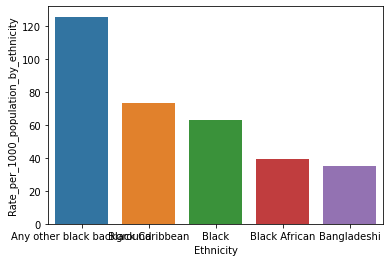

In [39]:

ethplot = sns.barplot(data=first5Rows, x="Ethnicity", y="Rate_per_1000_population_by_ethnicity")
